# Capstone project Notebook

In [16]:
import pandas as pd
import numpy as np
import requests
print("Pandas and NumPy successfully imported")
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
!pip install folium
import folium

Pandas and NumPy successfully imported


In [4]:
#importing the data
df_raw = pd.read_csv("https://www.dropbox.com/s/ljwpzf6xguleqos/postcodes%20v0.1.csv?dl=1")
df_raw

,Postcode,Latitude,Longitude
0,AB1 0AA,57.101474,-2.242851
1,AB1 0AB,57.102554,-2.246308
2,AB1 0AD,57.100556,-2.248342
3,AB1 0AE,57.084444,-2.255708
4,AB1 0AF,57.096656,-2.258102
...,...,...,...
1048570,HU20 3AB,53.773097,-0.527704
1048571,HU20 3LA,53.789894,-0.508787
1048572,HU20 3LB,53.780623,-0.414593
1048573,HU20 3UA,53.789973,-0.512261


# This Folium Map (below) will NOT be visible in GitHub due to Git security policy

In [6]:

m = folium.Map(location=[54.18764, -2.01818], zoom_start=6)
tooltip = "Centre of a postcode district"

z=0
while z<1048574:
    folium_latitude = float(df_raw.loc[z, 'Latitude'])
    folium_longitude = float(df_raw.loc[z, 'Longitude'])
    folium.Circle(
        radius=100,
        location=[folium_latitude, folium_longitude],
        popup="Area",
        color="crimson",
        fill=False,
    ).add_to(m)
    z=z+1

print(m)

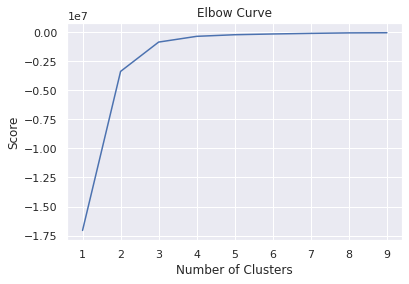

done


In [10]:
#Plot and elbow curve to show the optimal number of clusters for the machine learning algorithm

X=df_raw.loc[:,['Postcode', 'Latitude','Longitude']]
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_raw[['Latitude']]
X_axis = df_raw[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
print("done")

In [13]:
#Apply the K-Means machine learning algorithm

kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each pointX.head(10)
X.head(10)

,Postcode,Latitude,Longitude,cluster_label
0,AB1 0AA,57.101474,-2.242851,2
1,AB1 0AB,57.102554,-2.246308,2
2,AB1 0AD,57.100556,-2.248342,2
3,AB1 0AE,57.084444,-2.255708,2
4,AB1 0AF,57.096656,-2.258102,2
5,AB1 0AG,57.097085,-2.267513,2
6,AB1 0AJ,57.099011,-2.252854,2
7,AB1 0AL,57.101765,-2.254688,2
8,AB1 0AN,57.097553,-2.245483,2
9,AB1 0AP,57.098244,-2.245768,2


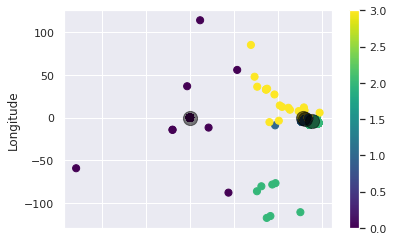

In [15]:
#Visualise the K-means machine learning algorithm

X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)